In [2]:
import pandas as pd
from sklearn import neighbors
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
train_df_1 = pd.read_csv('RobotDataset/Robot1',delimiter=' ', header=None, names = ['class', 'a1', 'a2', 'a3', 'a4', 'a5','a6', 'id'])

In [3]:
train_df_2 = pd.read_csv('RobotDataset/Robot2',delimiter=' ', header=None, names = ['class', 'a1', 'a2', 'a3', 'a4', 'a5','a6', 'id'])

In [4]:
train_df_3 = pd.read_csv('Iris/Iris.csv', header=None, names = ['sl', 'sw', 'pl', 'pw', 'class'])

In [5]:
train_df_1.head()

,class,a1,a2,a3,a4,a5,a6,id
NaN,1,1,1,1,1,3,1,data_5
NaN,1,1,1,1,1,3,2,data_6
NaN,1,1,1,1,3,2,1,data_19
NaN,1,1,1,1,3,3,2,data_22
NaN,1,1,1,2,1,2,1,data_27


In [6]:
train_df_1.shape

(124, 8)

In [7]:
train_df_1['id'].unique().tolist()

['data_5',
 'data_6',
 'data_19',
 'data_22',
 'data_27',
 'data_28',
 'data_37',
 'data_39',
 'data_42',
 'data_50',
 'data_51',
 'data_53',
 'data_56',
 'data_57',
 'data_61',
 'data_62',
 'data_64',
 'data_67',
 'data_72',
 'data_76',
 'data_86',
 'data_87',
 'data_88',
 'data_92',
 'data_93',
 'data_94',
 'data_99',
 'data_103',
 'data_107',
 'data_111',
 'data_114',
 'data_116',
 'data_117',
 'data_119',
 'data_120',
 'data_124',
 'data_130',
 'data_132',
 'data_134',
 'data_135',
 'data_136',
 'data_137',
 'data_139',
 'data_143',
 'data_144',
 'data_149',
 'data_150',
 'data_153',
 'data_154',
 'data_156',
 'data_157',
 'data_159',
 'data_160',
 'data_167',
 'data_172',
 'data_173',
 'data_176',
 'data_181',
 'data_184',
 'data_188',
 'data_191',
 'data_195',
 'data_196',
 'data_197',
 'data_206',
 'data_209',
 'data_210',
 'data_212',
 'data_214',
 'data_216',
 'data_217',
 'data_222',
 'data_223',
 'data_224',
 'data_227',
 'data_239',
 'data_241',
 'data_249',
 'data_253',
 '

In [8]:
train_df_2.head()

,class,a1,a2,a3,a4,a5,a6,id
NaN,1,1,1,1,1,1,2,data_2
NaN,1,1,1,1,1,2,1,data_3
NaN,1,1,1,1,1,2,2,data_4
NaN,0,1,1,1,1,3,1,data_5
NaN,0,1,1,1,1,4,1,data_7


In [9]:
train_df_2.shape

(122, 8)

In [10]:
train_df_2['class'].unique().tolist()

[1, 0]

In [11]:
train_df_3.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [12]:
train_df_3['class'].unique().tolist()

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

In [13]:
mp = {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2}
train_df_3['class'] = train_df_3['class'].map(mp) 

In [14]:
len(train_df_3)

135

In [15]:
train_df_1 = train_df_1.drop('id', axis=1)
train_df_2 = train_df_2.drop('id', axis=1)
#train_df_3 = train_df_3.drop('id', axis=1)

In [16]:
# probs = np.random.rand(len(train_df_1))
# training_mask = probs <= 0.8
# validation_mask = probs > 0.8
# train_1 =  train_df_1[training_mask]
# val_1 = train_df_1[validation_mask]
X_train_1, Y_train_1 = train_df_1.drop(['class'], axis = 1), train_df_1['class']
# X_val_1, Y_val_1 = val_1.drop(['id', 'class'], axis=1), val_1['class']

In [17]:
# probs = np.random.rand(len(train_df_1))
# training_mask = probs <= 0.8
# validation_mask = probs > 0.8
# train_2 =  train_df_2[training_mask]
# val_2 = train_df_2[validation_mask]
X_train_2, Y_train_2 = train_df_2.drop(['class'], axis = 1), train_df_2['class']
# X_val_2, Y_val_2 = val_1.drop(['id', 'class'], axis=1), val_1['class']

In [18]:
# probs = np.random.rand(len(train_df_1))
# training_mask = probs <= 0.8
# validation_mask = probs > 0.8
# train_3 =  train_df_3[training_mask]
# val_3 = train_df_3[validation_mask]
X_train_3, Y_train_3 = train_df_3.drop('class', axis = 1), train_df_3['class']
# X_val_3, Y_val_3 = val_3.drop('class', axis=1), val_3['class']

In [19]:
X_train_1

,a1,a2,a3,a4,a5,a6
NaN,1,1,1,1,3,1
NaN,1,1,1,1,3,2
NaN,1,1,1,3,2,1
NaN,1,1,1,3,3,2
NaN,1,1,2,1,2,1
NaN,1,1,2,1,2,2
NaN,1,1,2,2,3,1
NaN,1,1,2,2,4,1
NaN,1,1,2,3,1,2
NaN,1,2,1,1,1,2


In [20]:
mean = np.sum(X_train)/len(X_train)
stnd = np.std(X_train, axis=0)

NameError: name 'X_train' is not defined

In [ ]:
mean

In [ ]:
stnd

In [ ]:
X_train

In [ ]:
#X_train_n = (X_train - mean)/stnd

In [ ]:
#X_val_n = (X_val - mean)/stnd

In [ ]:
X_train

In [ ]:
X_val

In [21]:
clf = neighbors.KNeighborsClassifier(n_neighbors=11, algorithm='brute', metric = 'euclidean')
clf.fit(X_train_1, Y_train_1)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [22]:
scores = cross_val_score(clf, X_train_1, Y_train_1, cv=10, scoring='accuracy')

In [23]:
scores.mean()

0.7357142857142858

In [24]:
z

NameError: name 'z' is not defined

In [25]:
Y_val

NameError: name 'Y_val' is not defined

In [26]:
accuracy_score(Y_val, z)

NameError: name 'Y_val' is not defined

In [27]:
precision_recall_fscore_support(Y_val, z, average='binary')

NameError: name 'Y_val' is not defined

In [28]:
class  knearestneighbors:
    def __init__(self, k=1, metric='euclidean'):
        self.k = k
        self.metric = metric
    def fit(self, X_train, Y_train, X_val):
        #self.k = kwargs['k']
        #self.metric = kwargs['metric']
        ans = [0]*len(X_val)
        for i in range(len(X_val)):
            lst = []
            for j in range(len(X_train)):
                s = 0.0
                #print(X_val.iloc[i,:])
                #print(X_train.iloc[j,:])
                #print()
                if self.metric == 'euclidean':
                    s = np.sum(np.square(np.subtract(X_val.iloc[i,:], X_train.iloc[j,:])))
                elif self.metric == 'minkowski':
                    s = (np.sum((np.subtract(val.iloc[i,:], X_train.iloc[j,:]))**len(X_train.iloc[i])))**(1/(len(X_train.iloc[i])))
                #print(s)
                lst.append((s,Y_train.iloc[j]))
            lst = sorted(lst)
            #print(lst)
            trg = []
            for f in range(self.k):
               trg.append(lst[f][1])
            #print(i)
            #print(self.k)
            ans[i] = Counter(trg).most_common(1)[0][0]
            #print()
        return ans
    def predict(self, X_train, Y_train, X_val):
        ans = [0]*len(X_val)
        for i in range(len(X_val)):
            lst = []
            for j in range(len(X_train)):
                s = 0.0
                #print(X_val.iloc[i,:])
                #print(X_train.iloc[j,:])
                #print()
                if self.metric == 'euclidean':
                    s = np.sum(np.square(np.subtract(X_val.iloc[i,:], X_train.iloc[j,:])))
                elif self.metric == 'minkowski':
                    s = (np.sum((np.subtract(val.iloc[i,:], X_train.iloc[j,:]))**len(X_train.iloc[i])))**(1/(len(X_train.iloc[i])))
                #print(s)
                lst.append((s,Y_train.iloc[j]))
            lst = sorted(lst)
            trg = []
            for f in range(self.k):
               trg.append(lst[f][1])
            ans[i] = Counter(trg).most_common(1)[0][0]
            #print()
        return ans

In [29]:
clf1 = knearestneighbors(k=5)

In [30]:
def k_fold_cross_val(X_train,Y_train, clf, k_fold=5):
    kf = KFold(n_splits=k_fold, shuffle=True)
    accuracy = []
    recall = []
    precision = []
    f1 = []
    for train, test in kf.split(X_train):
        #print(test)
        #X_train, Y_train = train.drop('class', axis = 1), train['class']
        Xtrain, Xtest = X_train.iloc[train], X_train.iloc[test]
        Ytrain, Ytest = Y_train.iloc[train], Y_train.iloc[test]
        ans = clf.fit(Xtrain, Ytrain, Xtest)
        accuracy.append(accuracy_score(Ytest, ans))
        res = precision_recall_fscore_support(Ytest, ans, average='weighted')
        recall.append(res[0])
        precision.append(res[1])
        f1.append(res[2])
    return sum(accuracy)/len(accuracy), sum(recall)/len(recall), sum(precision)/len(precision), sum(f1)/len(f1), 

In [31]:
k_fold_cross_val(X_train_1, Y_train_1, clf1)

(0.7593333333333333,
 0.7936187716652113,
 0.7593333333333333,
 0.7517755386376075)

In [32]:
k_fold_cross_val(X_train_2, Y_train_2, clf1)

(0.8523333333333334,
 0.8655871481459716,
 0.8523333333333334,
 0.8498644210377508)

In [33]:
k_fold_cross_val(X_train_3, Y_train_3, clf1)

(0.9703703703703702,
 0.9723456790123457,
 0.9703703703703702,
 0.9705564236363852)

In [ ]:
acc_lst = []
for i in range(1,30,2):
    clf = knearestneighbors(k=i)
    acc_lst.append((i,k_fold_cross_val(X_train_1, Y_train_1, clf)[0]))

In [ ]:
X_lst = []
Y_lst = []
for i in range(0,len(acc_lst)):
    X_lst.append(acc_lst[i][0])
    Y_lst.append(acc_lst[i][1])
print(X_lst)
print(Y_lst)
plt.plot(X_lst,Y_lst)
plt.show()

In [3]:
train_df_4 = pd.read_csv('AdmissionDataset/data.csv')

In [4]:
train_df_4.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,247.726667,316.542222,107.162222,3.126667,3.361111,3.468889,8.577600,0.553333,0.720889
std,144.927656,11.335705,6.023554,1.140254,0.993374,0.919432,0.599454,0.497701,0.141398
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000,0.340000
25%,124.250000,308.250000,103.000000,2.000000,2.500000,3.000000,8.122500,0.000000,0.630000
50%,246.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [119]:
len(train_df_4)

450

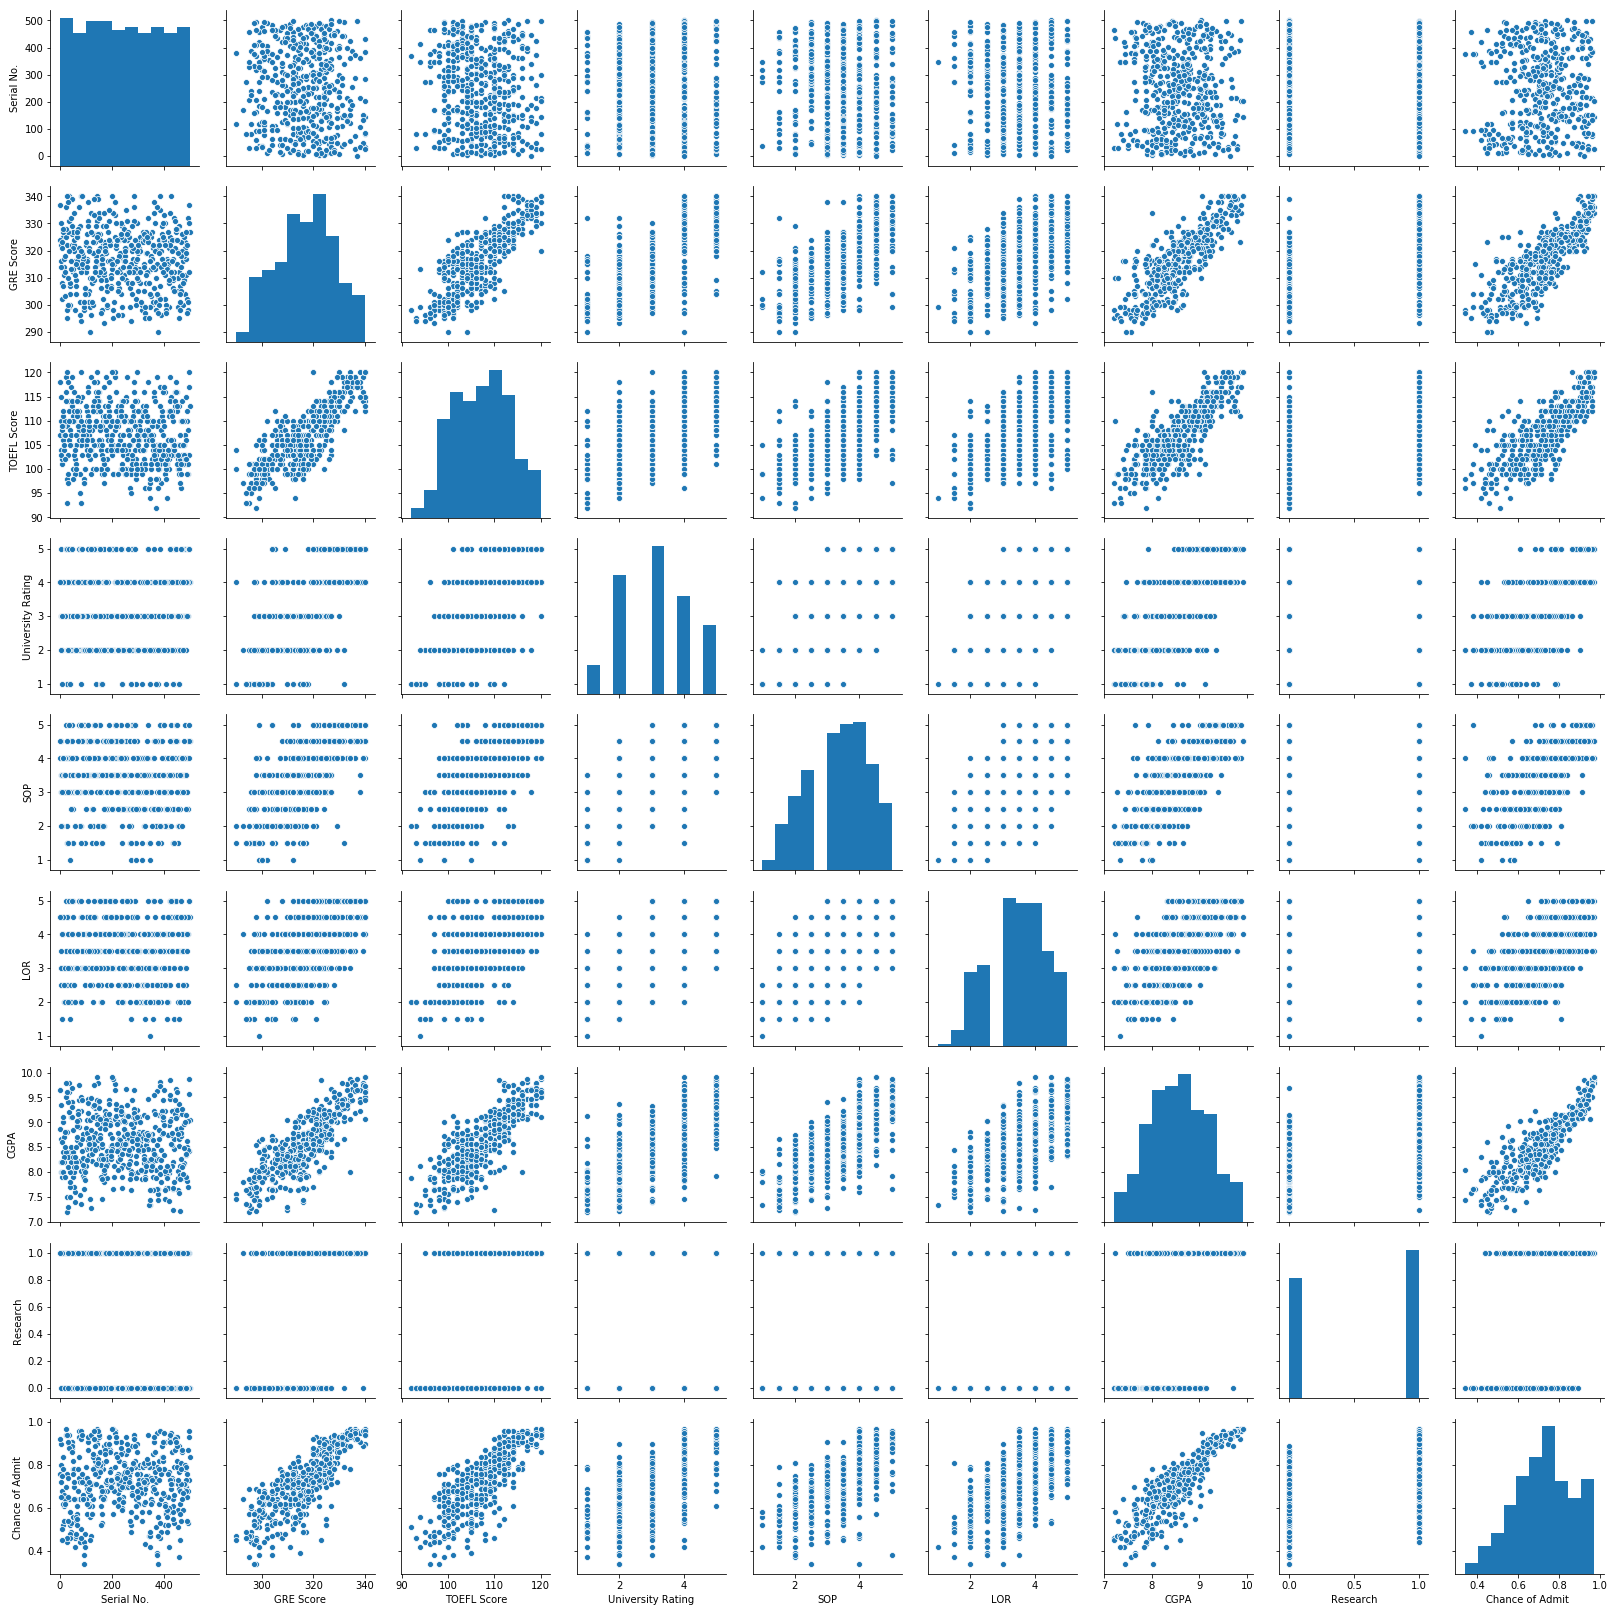

In [181]:
import seaborn as sns
g = sns.pairplot(train_df_4)

In [821]:
train_df_4 = train_df_4.drop('Serial No.', axis=1)

In [121]:
train_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
GRE Score            450 non-null int64
TOEFL Score          450 non-null int64
University Rating    450 non-null int64
SOP                  450 non-null float64
LOR                  450 non-null float64
CGPA                 450 non-null float64
Research             450 non-null int64
Chance of Admit      450 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.2 KB


In [122]:
train_df_4['Research'].unique().tolist()

[0, 1]

In [123]:
train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']] = (train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']] - train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].mean())/(train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].std())

In [124]:
#train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']] = (train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']] - train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].min())/(train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].max()-train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].min())

In [125]:
train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.040384,-0.690991,-0.988084,-0.866855,-1.597605,-0.713316,-1.111779
1,0.216817,0.139084,-0.111086,-0.363520,0.033837,-0.062724,0.897460
2,0.481468,0.471114,-0.111086,0.139815,-1.053791,0.154140,0.897460
3,0.834335,0.969158,1.642909,1.146486,0.577651,1.371916,0.897460
4,0.216817,-0.192946,-0.111086,0.139815,-1.053791,-0.413043,0.897460
5,-1.282869,-0.857006,-0.111086,0.139815,1.665279,-0.413043,-1.111779
6,0.481468,0.471114,1.642909,1.146486,0.577651,0.654596,-1.111779
7,-0.841785,-0.026931,-0.988084,-0.363520,0.033837,-0.096087,0.897460
8,-0.136050,-0.358961,-0.111086,-1.370190,-1.053791,-0.162815,-1.111779
9,-1.812170,-1.687081,-0.988084,-1.873525,-1.597605,-1.297181,-1.111779


In [126]:
mean = np.sum(train_df_4[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']])/len(train_df_4)

In [127]:
mean

GRE Score            3.034610e-17
TOEFL Score         -6.476301e-16
University Rating    1.376060e-16
SOP                 -3.083953e-19
LOR                 -5.649802e-17
CGPA                -6.568573e-15
Research            -7.105427e-17
dtype: float64

In [128]:
pd.options.display.max_columns = 500
probs = np.random.rand(len(train_df_4))
training_mask = probs <= 0.8
validation_mask = probs > 0.8
train_4 =  train_df_4[training_mask]
val_4 = train_df_4[validation_mask]
X_train_4, Y_train_4 = train_4.drop('Chance of Admit ', axis = 1), train_4['Chance of Admit ']
X_val_4, Y_val_4 = val_4.drop('Chance of Admit ', axis=1), val_4['Chance of Admit ']

In [129]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_4, Y_train_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
g = reg.predict(X_val_4)

In [131]:
g

array([0.73727095, 0.69499756, 0.96939817, 0.51143521, 0.6128704 ,
       0.76898991, 0.52400236, 0.98874223, 0.68029143, 0.63519173,
       0.55110036, 0.61620409, 0.87420481, 0.83678922, 0.62578528,
       0.68968864, 0.88673721, 0.66479133, 0.62234913, 0.64976158,
       0.68326406, 0.76201285, 0.53687964, 0.59759774, 0.58696061,
       0.62257525, 0.72702375, 0.78201601, 0.66826239, 0.77810411,
       0.82677964, 0.71876262, 0.57766864, 0.5992595 , 0.68634396,
       0.70393563, 0.73609523, 0.79176095, 0.61337721, 0.70185938,
       0.6906918 , 0.65521828, 0.77457391, 0.81691154, 0.7349407 ,
       0.9873032 , 0.71458754, 0.71016978, 0.8184452 , 0.79014164,
       0.75909841, 0.84854602, 0.95706149, 0.82901836, 0.8475384 ,
       0.95385377, 0.93451084, 0.71250056, 0.58493577, 0.85557023,
       0.68177368, 0.86071857, 0.69545374, 0.6459098 , 0.48282902,
       0.85229246, 0.99917246, 0.65322271, 0.82647042, 0.63782534,
       0.74436172, 0.6274984 , 0.6285132 , 0.91052746, 0.65917

In [132]:
reg.score(X_val_4, Y_val_4)

0.7902034360101626

In [133]:
Y_train_4

0      0.65
2      0.80
3      0.91
5      0.65
6      0.78
7      0.78
8      0.75
9      0.49
10     0.80
11     0.92
12     0.65
13     0.79
15     0.74
16     0.90
17     0.78
19     0.51
20     0.54
21     0.64
22     0.53
23     0.68
24     0.84
25     0.52
26     0.52
28     0.94
29     0.92
30     0.77
31     0.61
32     0.67
33     0.79
35     0.39
       ... 
416    0.90
417    0.49
418    0.47
419    0.77
420    0.95
421    0.73
422    0.55
423    0.76
424    0.78
425    0.77
426    0.68
427    0.49
428    0.90
429    0.62
430    0.75
431    0.70
433    0.70
434    0.67
435    0.71
438    0.86
439    0.73
440    0.34
441    0.78
442    0.66
443    0.54
444    0.86
446    0.71
447    0.61
448    0.92
449    0.67
Name: Chance of Admit , Length: 354, dtype: float64

In [134]:
class linear_regression:
    def __init__(self, alpha=0.1, iteration=1000, loss_func = "MSE"):
        self.alpha = alpha 
        self.iterations = iteration
        self.loss_func = loss_func
        self.theta = []
    def gradient_descent(self,x_tr, y_tr):
        m = x_tr.size
        theta = np.random.rand(len(x_tr.iloc[0])+1)
        past_costs = []
        past_thetas = [theta]
        x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
        for i in range(self.iterations):
            prediction = np.dot(x, theta.T)
            #print(len(prediction) == len(x_tr))
            error = prediction - y_tr
            #print(error)
            if self.loss_func == 'MSE':
                cost = 1/(2*m) * np.dot(error.T, error)
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
            elif self.loss_func == 'MAE':
                    cost = 1/(m)*np.sum(np.abs(error))
                    past_costs.append(cost)
                    theta = theta - (self.alpha * (1/m) *( np.dot(x.T, error/np.abs(error))))
            elif self.loss_func == 'MAPE':
                cost = 1/(m)*np.sum(np.abs(error)/y_tr)
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/m) *( np.dot(x.T, error/(y_tr*np.abs(error)))))
            past_thetas.append(theta)
            self.theta = past_thetas[-1]
        return past_thetas, past_costs
    def predict(self, x_val):
        x = np.c_[np.ones(len(X_val_4.iloc[:,0])),x_val]
        return np.dot(x, self.theta.T)
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [152]:
clf = linear_regression(loss_func='MAPE')

In [153]:
past_thetas, past_costs = clf.gradient_descent(X_train_4, Y_train_4)
theta = past_thetas[-1]

In [154]:
prediction = clf.predict(X_val_4)

In [155]:
error = prediction - Y_val_4
cost = 1/(2*len(X_val_4)) * np.dot(error.T, error)

In [156]:
print(cost)

0.0023541028493024798


In [157]:
len(X_val_4)

96

In [158]:
len(prediction)

96

In [159]:
from sklearn.metrics import mean_squared_error
err = mean_squared_error(prediction, Y_val_4)
err

0.0047082056986049595

In [160]:
from sklearn.metrics import r2_score
err = r2_score(prediction, Y_val_4)
err

0.7704261084949056

In [436]:
prediction

array([0.61743988, 0.82971692, 0.81118131, 0.98267305, 0.51031845,
       0.81419486, 0.56397276, 0.62452389, 0.87069352, 0.67453559,
       0.89171115, 0.91070884, 0.68534771, 0.87172391, 0.81254127,
       0.81709795, 0.51916836, 0.82055655, 0.86398106, 0.48912396,
       0.56987379, 0.90976388, 0.95436486, 0.62379763, 0.674085  ,
       0.85457118, 0.60772266, 0.65187613, 0.77016772, 0.67517533,
       0.77720231, 0.66556091, 0.65427732, 0.7243393 , 0.60638834,
       0.8205405 , 0.91787188, 0.54890776, 0.73745487, 0.79973414,
       0.86926156, 0.62011676, 0.58362929, 0.9256316 , 0.53197841,
       0.93389605, 0.70273405, 0.70137758, 0.61996499, 0.81663761,
       0.54825191, 0.81987121, 0.7634009 , 0.72464087, 0.84190412,
       0.82246881, 0.49611593, 0.61887332, 0.55423903, 0.7281822 ,
       0.82493372, 0.70357511, 0.59282603, 0.63438824, 0.59424613,
       0.96987619, 0.66583654, 0.69871255, 0.47597451, 0.86777475,
       0.71047246, 0.75659393, 0.56194205, 0.69537316, 0.73592

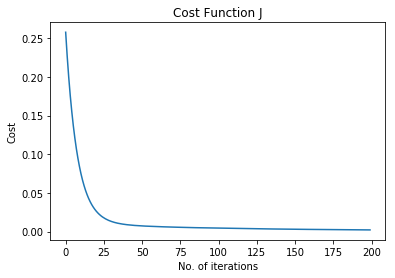

In [275]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
print(past_costs)

In [ ]:
X_lst = []
for i in range (len(past_thetas)):
    X_lst.append(past_thetas[i][6])
plt.plot(X_lst)
plt.show()

In [822]:
class logistic_regression:
    def __init__(self, alpha=0.1, iteration=300):
        self.alpha = alpha 
        self.iterations = iteration
        self.theta = []
    def gradient_descent(self,x_tr, y_tr):
        m = x_tr.size
        theta = np.random.rand(len(x_tr.iloc[0])+1)
        past_costs = []
        past_thetas = [theta]
        x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
        for i in range(self.iterations):
            prediction = self.sigmoid(-np.dot(x, theta.T))
            prediction[prediction>=0.5] = 1
            prediction[prediction<0.5] = 0
            #print(len(prediction) == len(x_tr))
            error = prediction - y_tr
            #print(error)
            cost = 1/(m) * (np.dot(y_tr.T, error) + np.dot(1-y_tr,1-error))
            past_costs.append(cost)
            theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
            past_thetas.append(theta)
            self.theta = past_thetas[-1]
        return past_thetas, past_costs
    def predict(self, x_val):
        x = np.c_[np.ones(len(X_val_4.iloc[:,0])),x_val]
        prediction = np.dot(x, self.theta.T)
        prediction[prediction>=0.5] = 1
        prediction[prediction<0.5] = 0
        return prediction
    def sigmoid(self,x):
        return 1/1+np.exp(x)
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [823]:
clf = logistic_regression()

In [824]:
pd.options.display.max_columns = 500
probs = np.random.rand(len(train_df_4))
training_mask = probs <= 0.8
validation_mask = probs > 0.8
train_4 =  train_df_4[training_mask]
val_4 = train_df_4[validation_mask]
X_train_4, Y_train_4 = train_4.drop('Chance of Admit ', axis = 1), train_4['Chance of Admit ']
X_val_4, Y_val_4 = val_4.drop('Chance of Admit ', axis=1), val_4['Chance of Admit ']

In [825]:
Y_train_4[Y_train_4>=0.5] = 1
Y_train_4[Y_train_4<0.5] = 0
Y_val_4[Y_val_4>=0.5] = 1
Y_val_4[Y_val_4<0.5] = 0

/home/neil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/neil/.local/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/neil/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.u

In [826]:
Y_train_4

0      1.0
2      1.0
3      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      0.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
16     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
35     0.0
36     1.0
      ... 
410    1.0
412    1.0
413    0.0
414    1.0
416    1.0
417    0.0
418    0.0
420    1.0
421    1.0
422    1.0
424    1.0
425    1.0
426    1.0
427    0.0
429    1.0
430    1.0
431    1.0
432    1.0
433    1.0
434    1.0
435    1.0
436    1.0
437    1.0
438    1.0
439    1.0
440    0.0
441    1.0
446    1.0
447    1.0
448    1.0
Name: Chance of Admit , Length: 352, dtype: float64

In [827]:
past_thetas, past_costs = clf.gradient_descent(X_train_4, Y_train_4)

/home/neil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


In [828]:
past_thetas[-1]

array([ 4.29717794e-02, -1.09925318e+02, -3.57131797e+01, -4.46282539e-01,
        5.74195035e-02, -4.00098259e-01, -2.63557967e+00,  3.81653916e-01])

In [829]:
prediction = clf.predict(X_val_4)

In [830]:
accuracy_score(prediction, Y_val_4)

0.05102040816326531

In [4]:
train_df_5 = pd.read_csv('LoanDataset/data.csv', header=None, names = ['id', 'age', 'experience','income', 'zip', 'family size', 'monthly spend', 'education', 'mortage', 'accepted loan', 'security account', 'certificate of deposit', 'internet banking', 'credit card' ])

In [5]:
train_df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 14 columns):
id                        4499 non-null int64
age                       4499 non-null int64
experience                4499 non-null int64
income                    4499 non-null int64
zip                       4499 non-null int64
family size               4499 non-null int64
monthly spend             4499 non-null float64
education                 4499 non-null int64
mortage                   4499 non-null int64
accepted loan             4499 non-null int64
security account          4499 non-null int64
certificate of deposit    4499 non-null int64
internet banking          4499 non-null int64
credit card               4499 non-null int64
dtypes: float64(1), int64(13)
memory usage: 492.2 KB


In [6]:
train_df_5.head()

,id,age,experience,income,zip,family size,monthly spend,education,mortage,accepted loan,security account,certificate of deposit,internet banking,credit card
0,2701,31,5,39,94590,4,2.2,2,0,0,0,0,1,1
1,2716,42,18,54,90089,1,1.8,1,0,0,0,0,1,0
2,3359,59,35,40,94536,4,0.4,1,0,0,0,0,0,0
3,2492,38,14,80,92868,2,2.7,1,0,0,0,0,1,0
4,937,62,32,19,92109,1,1.5,3,0,0,1,0,0,0


In [37]:
len(train_df_5['zip'].unique().tolist())

466

In [7]:
mp = {x:i for x,i in zip(train_df_5['zip'].unique().tolist(),range(len(train_df_5['zip'].unique().tolist())))}

In [39]:
mp

{94590: 0,
 90089: 1,
 94536: 2,
 92868: 3,
 92109: 4,
 90025: 5,
 92182: 6,
 94583: 7,
 95973: 8,
 94304: 9,
 91016: 10,
 93106: 11,
 90058: 12,
 95039: 13,
 92103: 14,
 92660: 15,
 90065: 16,
 90029: 17,
 92124: 18,
 94720: 19,
 91107: 20,
 94523: 21,
 92691: 22,
 93108: 23,
 94122: 24,
 93009: 25,
 90274: 26,
 95449: 27,
 92697: 28,
 94305: 29,
 93943: 30,
 92407: 31,
 92068: 32,
 95482: 33,
 93107: 34,
 92096: 35,
 92028: 36,
 92612: 37,
 91741: 38,
 92694: 39,
 94539: 40,
 94063: 41,
 95051: 42,
 92007: 43,
 90071: 44,
 92780: 45,
 91775: 46,
 94102: 47,
 95014: 48,
 95133: 49,
 90035: 50,
 94542: 51,
 95023: 52,
 95814: 53,
 95833: 54,
 94501: 55,
 94025: 56,
 95818: 57,
 94117: 58,
 90245: 59,
 93611: 60,
 94105: 61,
 91320: 62,
 95616: 63,
 93401: 64,
 95112: 65,
 96150: 66,
 93105: 67,
 94609: 68,
 91605: 69,
 92126: 70,
 92646: 71,
 90024: 72,
 94080: 73,
 92120: 74,
 94132: 75,
 93907: 76,
 92093: 77,
 92192: 78,
 94551: 79,
 92626: 80,
 94611: 81,
 92806: 82,
 94534: 83,
 9

In [8]:
train_df_5['zip'] = train_df_5['zip'].map(mp)

In [9]:
train_df_5 = train_df_5.drop('id', axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df_5.drop('accepted loan', axis=1),train_df_5['accepted loan'], test_size=0.2,shuffle=True)

In [11]:
Y_train

966     0
3440    0
1430    1
4207    0
518     0
3933    0
2077    0
2311    0
1274    0
3340    0
3366    1
3244    0
93      0
2297    0
2430    1
3425    0
1208    0
1580    0
2982    0
1661    0
2761    0
834     1
165     0
1425    0
4423    0
1937    1
1479    1
66      0
1231    0
2187    0
       ..
4325    0
2480    1
1819    0
2357    0
3260    0
2945    0
3206    0
2975    0
3839    1
886     0
2174    0
2298    0
425     1
3653    0
1830    0
162     0
2105    0
3853    0
2022    0
799     0
3130    0
3156    0
4375    0
1756    0
1664    0
2666    0
2731    0
147     0
2604    0
652     0
Name: accepted loan, Length: 3599, dtype: int64

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred =  gnb.predict(X_test)

In [45]:
accuracy_score(y_pred, Y_test)

0.8788888888888889

In [46]:
train_df_5

,age,experience,income,zip,family size,monthly spend,education,mortage,accepted loan,security account,certificate of deposit,internet banking,credit card
0,31,5,39,0,4,2.20,2,0,0,0,0,1,1
1,42,18,54,1,1,1.80,1,0,0,0,0,1,0
2,59,35,40,2,4,0.40,1,0,0,0,0,0,0
3,38,14,80,3,2,2.70,1,0,0,0,0,1,0
4,62,32,19,4,1,1.50,3,0,0,1,0,0,0
5,61,35,35,5,2,0.20,3,0,0,0,0,1,0
6,38,14,74,6,2,0.00,1,0,0,1,0,1,0
7,33,8,122,7,1,0.00,1,0,0,0,0,1,1
8,26,0,164,8,2,4.00,3,301,1,0,0,1,0
9,29,3,108,9,4,1.80,2,0,0,0,0,0,0


In [12]:
X_train, Y_train = train_df_5.drop('accepted loan', axis=1), train_df_5['accepted loan']

In [48]:
X_train

,age,experience,income,zip,family size,monthly spend,education,mortage,security account,certificate of deposit,internet banking,credit card
0,31,5,39,0,4,2.20,2,0,0,0,1,1
1,42,18,54,1,1,1.80,1,0,0,0,1,0
2,59,35,40,2,4,0.40,1,0,0,0,0,0
3,38,14,80,3,2,2.70,1,0,0,0,1,0
4,62,32,19,4,1,1.50,3,0,1,0,0,0
5,61,35,35,5,2,0.20,3,0,0,0,1,0
6,38,14,74,6,2,0.00,1,0,1,0,1,0
7,33,8,122,7,1,0.00,1,0,0,0,1,1
8,26,0,164,8,2,4.00,3,301,0,0,1,0
9,29,3,108,9,4,1.80,2,0,0,0,0,0


In [13]:
discrete = ['education', 'family size', 'security account', 'certificate of deposit', 'internet banking', 'credit card', 'zip']
continuous = ['age', 'experience', 'income', 'mortage']

In [50]:
mean_X_C_Y = X_train[continuous][Y_train==1].mean()
mean_X_C_N = X_train[continuous][Y_train==0].mean()

In [94]:
mean_X_C_Y

age            44.970046
experience     19.748848
income        144.417051
mortage        97.129032
dtype: float64

In [52]:
var_X_C_Y = X_train[continuous][Y_train==1].var()
var_X_C_N = X_train[continuous][Y_train==0].var()

In [97]:
var_X_C_Y

age             134.717345
experience      134.059179
income          999.638600
mortage       24873.078000
dtype: float64

In [54]:
def likelihood(X, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp((-(X - mean) ** 2) / (2 * variance))

In [55]:
likelihood(X_test[continuous], mean_X_C_Y, var_X_C_Y)

,age,experience,income,mortage
1535,0.020195,0.020591,0.000301,0.002093
2771,0.031360,0.032696,0.002716,0.001904
430,0.025396,0.023283,0.009364,0.002505
739,0.027152,0.029073,0.011506,0.002093
2148,0.021990,0.024172,0.000006,0.002093
3089,0.034371,0.034384,0.000791,0.002093
1438,0.007823,0.009287,0.009814,0.002093
1061,0.021990,0.024172,0.000005,0.002093
1134,0.032419,0.031676,0.009364,0.002093
3099,0.016658,0.015308,0.000916,0.002093


In [56]:
likelihood(X_test[continuous], mean_X_C_N, var_X_C_N)

,age,experience,income,mortage
1535,0.019350,0.019787,0.009622,0.003671
2771,0.031167,0.032600,0.008430,0.000905
430,0.026314,0.024121,0.004119,0.003315
739,0.026599,0.028626,0.000772,0.003671
2148,0.021194,0.023468,0.005246,0.003671
3089,0.034838,0.034662,0.009798,0.003671
1438,0.007098,0.008564,0.003855,0.003671
1061,0.021194,0.023468,0.004957,0.003671
1134,0.032359,0.031456,0.004119,0.003671
3099,0.015765,0.014468,0.009744,0.003671


In [57]:
priors = [Counter(Y_train).most_common()[0][1]/len(Y_train),Counter(Y_train).most_common()[1][1]/len(Y_train)]

In [58]:
priors

[0.9035341186930429, 0.0964658813069571]

In [59]:
count_Y = len(X_train[discrete][Y_train==1])
count_N = len(X_train[discrete][Y_train==0])

In [60]:
count_N

4065

In [61]:
count_Y

434

In [62]:
prob_Y = []
prob_N = []
X_train_Y = X_train[Y_train == 1]
X_train_N = X_train[Y_train == 0]
for x in discrete:
    prob_Y.append(Counter(X_train_Y[x]))
    prob_N.append(Counter(X_train_N[x]))

In [63]:
len(X_train_N)

4065

In [64]:
for i in range(len(prob_Y)):
    for key in prob_Y[i]:
        prob_Y[i][key]/=len(X_train_Y)

In [65]:
prob_Y

[Counter({3: 0.4400921658986175,
          2: 0.37327188940092165,
          1: 0.18663594470046083}),
 Counter({2: 0.22350230414746544,
          3: 0.27419354838709675,
          4: 0.2834101382488479,
          1: 0.21889400921658986}),
 Counter({0: 0.8732718894009217, 1: 0.12672811059907835}),
 Counter({0: 0.7096774193548387, 1: 0.2903225806451613}),
 Counter({1: 0.6129032258064516, 0: 0.3870967741935484}),
 Counter({0: 0.7073732718894009, 1: 0.2926267281105991}),
 Counter({8: 0.002304147465437788,
          16: 0.004608294930875576,
          21: 0.002304147465437788,
          32: 0.002304147465437788,
          53: 0.01152073732718894,
          55: 0.004608294930875576,
          65: 0.002304147465437788,
          71: 0.0069124423963133645,
          73: 0.002304147465437788,
          20: 0.0069124423963133645,
          7: 0.004608294930875576,
          105: 0.002304147465437788,
          24: 0.004608294930875576,
          110: 0.002304147465437788,
          36: 0.006912

In [66]:
for i in range(len(prob_N)):
    for key in prob_N[i]:
        prob_N[i][key]/=len(X_train_N)

In [67]:
prob_N

[Counter({2: 0.27060270602706027,
          1: 0.44305043050430504,
          3: 0.2863468634686347}),
 Counter({4: 0.23886838868388685,
          1: 0.3006150061500615,
          2: 0.2646986469864699,
          3: 0.1958179581795818}),
 Counter({0: 0.8959409594095941, 1: 0.10405904059040591}),
 Counter({0: 0.9638376383763838, 1: 0.03616236162361624}),
 Counter({1: 0.6007380073800738, 0: 0.3992619926199262}),
 Counter({1: 0.29249692496924967, 0: 0.7075030750307503}),
 Counter({0: 0.002706027060270603,
          1: 0.008856088560885609,
          2: 0.0004920049200492004,
          3: 0.0014760147601476014,
          4: 0.0012300123001230013,
          5: 0.0036900369003690036,
          6: 0.0051660516605166054,
          7: 0.0031980319803198032,
          9: 0.008118081180811807,
          10: 0.0017220172201722018,
          11: 0.011808118081180811,
          12: 0.0009840098400984009,
          13: 0.0051660516605166054,
          14: 0.0031980319803198032,
          15: 0.001722

In [69]:
discrete_map = {x:i for x,i in zip(discrete, range(len(discrete)))}

In [70]:
discrete_map

{'education': 0,
 'family size': 1,
 'security account': 2,
 'certificate of deposit': 3,
 'internet banking': 4,
 'credit card': 5,
 'zip': 6}

In [74]:
X_ts = X_test[discrete].to_dict('records')

In [75]:
X_ts

[{'education': 1,
  'family size': 2,
  'security account': 0,
  'certificate of deposit': 0,
  'internet banking': 1,
  'credit card': 0,
  'zip': 372},
 {'education': 2,
  'family size': 3,
  'security account': 1,
  'certificate of deposit': 1,
  'internet banking': 1,
  'credit card': 0,
  'zip': 53},
 {'education': 1,
  'family size': 1,
  'security account': 0,
  'certificate of deposit': 0,
  'internet banking': 1,
  'credit card': 1,
  'zip': 13},
 {'education': 2,
  'family size': 2,
  'security account': 0,
  'certificate of deposit': 1,
  'internet banking': 1,
  'credit card': 1,
  'zip': 30},
 {'education': 3,
  'family size': 1,
  'security account': 0,
  'certificate of deposit': 0,
  'internet banking': 1,
  'credit card': 0,
  'zip': 159},
 {'education': 1,
  'family size': 3,
  'security account': 0,
  'certificate of deposit': 0,
  'internet banking': 1,
  'credit card': 0,
  'zip': 250},
 {'education': 1,
  'family size': 2,
  'security account': 0,
  'certificate o

In [133]:
ans = []
for i in range(len(Y_test)):
    yn = np.exp(np.log(len(X_train_N)/len(X_train)) + np.sum(np.ma.log([prob_N[discrete_map[key]][X_ts[i][key]] for key in X_ts[i]])) + np.sum(np.log(likelihood(X_test[continuous].iloc[i], mean_X_C_N, var_X_C_N))))
    yy = np.exp(np.log(len(X_train_Y)/len(X_train)) + np.sum(np.ma.log([prob_Y[discrete_map[key]][X_ts[i][key]] for key in X_ts[i]])) + np.sum(np.log(likelihood(X_test[continuous].iloc[i], mean_X_C_Y, var_X_C_Y))))
    a = 0 if yn>yy else 1
    ans.append(a)

In [134]:
ans

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [135]:
precision_recall_fscore_support(ans, Y_test, average = 'binary')

(0.6041666666666666, 0.29, 0.3918918918918919, None)

In [117]:
np.exp(yn)

3.8814064397397063e-13

In [113]:
yy = []
for i in range(len(x_ts)):
    yy.append(np.log(len(X_train_Y)/len(X_train)) + np.sum(np.ma.log([prob_Y[discrete_map[key]][X_ts[0][key]] for key in X_ts[0]])) + np.sum(np.log(likelihood(X_test[continuous].iloc[0], mean_X_C_Y, var_X_C_Y))))

In [118]:
np.exp(yy)

2.8331715153787913e-13

In [98]:
np.log(likelihood(X_test[continuous].iloc[0], mean_X_C_Y, var_X_C_Y))

age          -3.902315
experience   -3.882909
income       -8.107939
mortage      -6.169353
dtype: float64

In [107]:
np.nansum(np.ma.log([prob_Y[discrete_map[key]][X_ts[0][key]] for key in X_ts[0]]))

-4.49112702700171

In [119]:
Y_test

1535    0
2771    1
430     0
739     1
2148    0
3089    0
1438    0
1061    0
1134    0
3099    0
4275    0
57      1
4071    0
255     0
3703    0
2011    0
2686    0
642     0
3239    1
524     0
3931    0
4326    0
819     0
1350    0
678     0
770     0
1037    0
3756    1
3786    0
2248    1
       ..
1541    0
3668    0
2316    0
508     0
1554    0
2209    0
230     0
492     0
22      0
1262    0
3524    1
3837    0
2512    0
1016    0
1434    0
351     0
1955    0
2580    0
831     0
2189    0
1560    0
211     0
2444    0
3063    0
1033    0
1351    0
3945    1
1888    0
3231    0
1741    0
Name: accepted loan, Length: 900, dtype: int64

In [79]:
d = [prob_N[discrete_map[key]][X_ts[0][key]] for key in X_ts[0]]

In [80]:
d

[0.44305043050430504,
 0.2646986469864699,
 0.8959409594095941,
 0.9638376383763838,
 0.6007380073800738,
 0.7075030750307503,
 0.0007380073800738007]

In [136]:
ans = []
for i in range(len(Y_test)):
    yn = (len(X_train_N)/len(X_train)) * np.prod([prob_N[discrete_map[key]][X_ts[i][key]] for key in X_ts[i]]) * np.prod(likelihood(X_test[continuous].iloc[i], mean_X_C_N, var_X_C_N))
    yy = (len(X_train_Y)/len(X_train)) * np.prod([prob_Y[discrete_map[key]][X_ts[i][key]] for key in X_ts[i]]) * np.prod(likelihood(X_test[continuous].iloc[i], mean_X_C_Y, var_X_C_Y))
    a = 0 if yn>yy else 1
    ans.append(a)

In [137]:
accuracy_score(ans, Y_test)

0.9366666666666666

In [18]:
class NaiveBayesClassifier:
    def __init__(self):
        self.mean_X_C_Y = 0
        self.mean_X_C_N = 0
        self.var_X_C_Y = 0
        self.var_X_C_N = 0
        self.priors = 0
        self.prob_Y = []
        self.prob_N = []
        self.discrete_map = {}
        self.l_X_train_Y = 0
        self.l_X_train_N = 0
        self.l_X_train = 0
        self.discrete = []
        self.continuous = []
    def fit(self, X_train, Y_train, discrete, continuous):
        self.discrete = discrete
        self.continuous = continuous
        self.mean_X_C_Y = X_train[continuous][Y_train==1].mean()
        self.mean_X_C_N = X_train[continuous][Y_train==0].mean()
        self.var_X_C_Y = X_train[continuous][Y_train==1].var()
        self.var_X_C_N = X_train[continuous][Y_train==0].var()
        self.priors = [Counter(Y_train).most_common()[0][1]/len(Y_train),Counter(Y_train).most_common()[1][1]/len(Y_train)]
        X_train_Y = X_train[Y_train == 1]
        X_train_N = X_train[Y_train == 0]
        self.l_X_train_Y = len(X_train_Y)
        self.l_X_train_N = len(X_train_N)
        self.l_X_train = len(X_train)
        for x in discrete:
            self.prob_Y.append(Counter(X_train_Y[x]))
            self.prob_N.append(Counter(X_train_N[x]))
        for i in range(len(self.prob_Y)):
            for key in self.prob_Y[i]:
                self.prob_Y[i][key]/=len(X_train_Y)
        for i in range(len(self.prob_N)):
            for key in self.prob_N[i]:
                self.prob_N[i][key]/=len(X_train_N)
        self.discrete_map = {x:i for x,i in zip(discrete, range(len(discrete)))}
    def likelihood(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp((-(X - mean) ** 2) / (2 * variance))
    def predict(self, X_test):
        ans = []
        X_ts = X_test[self.discrete].to_dict('records')
        for i in range(len(X_test)):
            yn = (self.l_X_train_N/self.l_X_train) * np.prod([self.prob_N[self.discrete_map[key]][X_ts[i][key]] for key in X_ts[i]]) * np.prod(self.likelihood(X_test[self.continuous].iloc[i], self.mean_X_C_N, self.var_X_C_N))
            yy = (self.l_X_train_Y/self.l_X_train) * np.prod([self.prob_Y[self.discrete_map[key]][X_ts[i][key]] for key in X_ts[i]]) * np.prod(self.likelihood(X_test[self.continuous].iloc[i], self.mean_X_C_Y, self.var_X_C_Y))
            a = 0 if yn>yy else 1
            ans.append(a)
        return ans

In [19]:
clf = NaiveBayesClassifier()

In [20]:
clf.fit(X_train, Y_train, discrete, continuous)

In [21]:
accuracy_score(clf.predict(X_test), Y_test)

0.9377777777777778

In [767]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [768]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.852189,0.278565,0.333786,6.355377,0.045758,35.307849,138.007827,0.994001,3.187675,0.488185,10.513036,5.873866
std,0.838939,0.100747,0.121491,4.981474,0.022044,17.024667,41.854932,0.002909,0.150323,0.113913,1.226730,0.882972
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.800000,0.050000,46.000000,167.000000,0.996040,3.280000,0.542500,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.200000,9.000000


In [769]:
Counter(train_df['quality'])

Counter({7: 785, 6: 1987, 5: 1311, 4: 150, 8: 153, 3: 17, 9: 5})

In [770]:
train_df.iloc[:,:-1] = (train_df.iloc[:,:-1] - train_df.iloc[:,:-1].mean())/train_df.iloc[:,:-1].std()

In [771]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [772]:
Y_train.unique().tolist()

[5, 7, 6, 8, 4, 9, 3]

In [773]:
y_tr_c = (Y_train==7).astype(int)

In [774]:
y_tr_c

3681    0
913     1
3882    1
1379    0
3554    0
38      0
3857    0
1196    0
2827    0
1845    0
1102    0
1864    0
1783    1
1476    1
1011    0
2302    0
1126    0
1912    0
1342    0
3822    0
102     1
862     0
506     1
2555    0
2446    0
2791    0
426     0
3565    0
448     0
1204    1
       ..
2573    0
935     0
19      0
401     0
4045    0
203     0
635     0
3716    0
1861    0
583     0
1576    0
1504    0
2139    0
2024    1
4095    1
2650    0
269     0
3067    0
1337    0
3143    0
1867    0
3955    0
3959    0
2858    0
2919    0
2410    0
923     0
1613    0
2524    0
521     0
Name: quality, Length: 3526, dtype: int64

In [775]:
class logistic_regressionOVA:
    def __init__(self, alpha=0.1, iteration=10000, classes=2):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.theta_c = []
    def gradient_descent(self,x_tr, y_tr):
        m = x_tr.size
        for c in range(self.classes):
            y_tr_c = (y_tr==c).astype(int)
            theta = np.random.rand(len(x_tr.iloc[0])+1)
            past_costs = []
            past_thetas = [theta]
            x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
            for i in range(self.iterations):
                prediction = self.sigmoid(-np.dot(x, theta.T))
                prediction[prediction>=0.5] = 1
                prediction[prediction<0.5] = 0
                #print(len(prediction) == len(x_tr))
                error = prediction - y_tr_c
                #print(error)
                cost = 1/(m) * (np.dot(y_tr_c.T, error) + np.dot(1-y_tr_c,1-error))
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                past_thetas.append(theta)
            self.theta_c.append(theta)
        #print(self.theta_c)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        #print(self.theta_c)
        for c in range(self.classes):
            x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
            print(self.theta_c[c])
            print()
            prediction = np.dot(x, self.theta_c[c].T)
            #print(prediction.shape)
            ans.append(prediction)
            #print(prediction.shape)
        ans = np.array(ans).T
        print(ans)
        return np.argmax(ans,axis=1)
    def sigmoid(self,x):
        return 1/1+np.exp(x)
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [776]:
clf = logistic_regressionOVA(classes = 10)

In [777]:
clf.gradient_descent(X_train,Y_train)

([array([0.98847147, 0.08133319, 0.19772264, 0.30952628, 0.52579356,
         0.32929543, 0.6299515 , 0.05653456, 0.8294587 , 0.02146744,
         0.39132913, 0.76960904]),
  array([0.97939345, 0.08146521, 0.19777543, 0.30961799, 0.52573665,
         0.32921038, 0.6299602 , 0.05647026, 0.82939745, 0.02142066,
         0.39126598, 0.76969648]),
  array([0.97031544, 0.08159724, 0.19782821, 0.3097097 , 0.52567973,
         0.32912534, 0.62996889, 0.05640595, 0.8293362 , 0.02137388,
         0.39120282, 0.76978392]),
  array([0.96123742, 0.08172926, 0.197881  , 0.30980141, 0.52562281,
         0.3290403 , 0.62997759, 0.05634164, 0.82927496, 0.0213271 ,
         0.39113967, 0.76987136]),
  array([0.9521594 , 0.08186128, 0.19793379, 0.30989313, 0.5255659 ,
         0.32895526, 0.62998629, 0.05627734, 0.82921371, 0.02128032,
         0.39107652, 0.7699588 ]),
  array([0.94308138, 0.0819933 , 0.19798658, 0.30998484, 0.52550898,
         0.32887022, 0.62999499, 0.05621303, 0.82915246, 0.0212335

In [778]:
ans = clf.predict(X_test)

[-9.03610195e+01  1.57253192e+00  8.78724594e-01  1.62740815e+00
 -1.33070669e-01 -5.80229342e-01  3.87156966e-01 -2.31035691e-01
  4.55107118e-01 -2.81175040e-01  4.27887736e-02  7.65825240e-01]

[-90.60128859   2.09427366   0.73657108   1.26567759  -0.18773724
  -0.65000407   0.65097504   0.17774816  -0.45227231  -0.15307341
   0.38076417   1.66952773]

[-89.98407826   2.10514114   0.91067114   1.03738951   0.36481565
  -0.73718008   0.70982993   0.25121399  -0.41262617  -0.19632682
  -0.58024564   0.92175028]

[-90.07832758   2.19710971   1.23208392   1.57092937  -0.15999357
  -0.34577014   1.5675084    0.5704738    0.23206728  -0.23283071
  -0.09538013   1.50454137]

[-8.70903337e+01  2.52349531e+00  4.24182562e+00  4.41856551e-01
 -1.15558733e+00  5.18238319e-01 -1.40892925e+00 -1.41810223e+00
  7.58579316e-02 -6.13729492e-01 -7.52410791e-01 -1.29428582e-01]

[-63.31893736   3.93131217   7.0091778    2.64818763   5.24513378
   6.69976362   2.55599097   8.09151881  11.33391495  -3.

In [779]:
 ans 

array([6, 6, 7, 5, 6, 5, 7, 5, 6, 5, 5, 7, 7, 5, 6, 6, 5, 7, 6, 7, 6, 6,
       5, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 7, 6, 7,
       6, 6, 5, 6, 6, 6, 7, 6, 7, 6, 6, 7, 5, 5, 7, 6, 5, 5, 6, 5, 7, 5,
       7, 6, 5, 6, 5, 6, 7, 6, 7, 7, 7, 6, 6, 6, 7, 6, 6, 7, 5, 6, 5, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 7, 6, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5,
       7, 6, 5, 6, 6, 6, 6, 7, 7, 6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 7,
       5, 7, 5, 5, 5, 5, 6, 5, 7, 6, 5, 7, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 5, 7, 7, 5, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 7,
       6, 7, 6, 6, 5, 6, 6, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7,
       5, 5, 5, 7, 5, 7, 5, 6, 5, 7, 6, 6, 5, 5, 6, 7, 5, 5, 7, 6, 5, 7,
       6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 6, 5, 6,

In [780]:
accuracy_score(ans,Y_test)

0.47732426303854875

In [381]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr').fit(X_train, Y_train)

In [371]:
ans = clf.predict(X_test)

In [375]:
clf.score(X_test, Y_test)

0.5317460317460317

In [813]:
class logistic_regressionOVO:
    def __init__(self, alpha=0.1, iteration=1000, classes=2):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.theta_c = {}
        self.mp = {}
    def gradient_descent(self,x_tr, y_tr):
        m = x_tr.size
        for i,x in zip(range(len(y_tr.unique().tolist())),y_tr.unique().tolist()):
            self.mp[i]=x
        self.classes = len(y_tr.unique().tolist())
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                print([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])
                x_tr_c = x_tr[list(x_tr.columns.values)][y_tr.isin([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])]
                y_tr_c12 = y_tr[:][y_tr.isin([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])]
                y_tr_c = (y_tr_c12==y_tr.unique().tolist()[c1]).astype(int)
                #print(y_tr_c)
                theta = np.random.rand(len(x_tr.iloc[0])+1)
                past_costs = []
                past_thetas = [theta]
                x = np.c_[np.ones(len(x_tr_c.iloc[:,0])),x_tr_c]
                if len(x_tr_c)>0:
                    for i in range(self.iterations):
                        prediction = self.sigmoid(-np.dot(x, theta.T))
                        prediction[prediction>=0.5] = 1
                        prediction[prediction<0.5] = 0
                        #print(len(prediction) == len(x_tr))
                        error = prediction - y_tr_c
                        #print(error)
                        cost = 1/(m) * (np.dot(y_tr_c.T, error) + np.dot(1-y_tr_c,1-error))
                        past_costs.append(cost)
                        theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                        past_thetas.append(theta)
                self.theta_c[(c1,c2)] = theta
        #print(self.theta_c)
        #print()
        print(self.mp)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        #print(self.theta_c)
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
                #print(self.theta_c[(c1,c2)])
                #print()
                prediction = np.dot(x, self.theta_c[(c1,c2)].T)
                #print(prediction.shape)
                #ans.append(prediction)
                #print(prediction.shape)
                prediction[prediction>=0.5] = self.mp[c1]
                prediction[prediction<0.5] = self.mp[c2]
                #print(prediction)
                ans.append(prediction)
                #print(ans)
        ans = np.array(ans).T
        pred = []
        for i in range(len(ans)):
            pred.append(Counter(ans[i]).most_common(1)[0][0])
        return pred
    def sigmoid(self,x):
        return 1/1+np.exp(x)
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [814]:
x_tr = X_train[list(X_train.columns.values)][Y_train.isin([2,3])]

In [815]:
clf = logistic_regressionOVO(classes=10)

In [816]:
a = clf.gradient_descent(X_train, Y_train)

[5, 7]
[5, 6]
[5, 8]
[5, 4]
[5, 9]
[5, 3]
[7, 6]
[7, 8]
[7, 4]
[7, 9]
[7, 3]
[6, 8]
[6, 4]
[6, 9]
[6, 3]
[8, 4]
[8, 9]
[8, 3]
[4, 9]
[4, 3]
[9, 3]
{0: 5, 1: 7, 2: 6, 3: 8, 4: 4, 5: 9, 6: 3}


In [817]:
np.set_printoptions(threshold=np.nan)
ans = clf.predict(X_test)

In [818]:
ans

[3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0

In [819]:
accuracy_score(ans,Y_test)

0.0045351473922902496

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsOneClassifier(LogisticRegression(random_state=0)).fit(X_train, Y_train)

/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [791]:
clf.score(X_test, Y_test)

0.5294784580498866

In [792]:
Y_train.unique().tolist()

[5, 7, 6, 8, 4, 9, 3]